In [1]:
# -*- coding: utf-8 -*-
# data analysis and wrangling
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline

import graphviz
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [5]:
#原始資料
df1 = pd.read_excel("c:/pythondata/StockMerg_20180418_0601 _多.xlsx")
df1 = df1[df1['上市上櫃'] == 1]
print('read ok1')

#計算510/20漲幅的資料
df2 = pd.read_excel("c:/pythondata/checkSocre_20180418_0601_model.xlsx")
print('read ok2')

x = df1.merge(df2,left_on=['日期','股票代號'],right_on=['選股日','股票代號'])
x.drop(['選股日','股票名稱_y'],axis=1)
x.head()

writer1= pd.ExcelWriter("c:/pythondata/StockModel_20180418_0601.xlsx")
x.to_excel(writer1,'Sheet1',index = False)
writer1.save() 
print('save ok')

read ok1
read ok2


In [2]:
df1 = pd.read_excel("c:/pythondata/StockModel_20180418_0601.xlsx")
print('read ok')

read ok


In [3]:
#del df1

#收集的資料,要訓練模型用

df = df1.copy()
df = df[(df['賺_20'] == 'N') | (df['賺_20'] == 'Y')]
df.fillna(0 ,inplace = True)
print(len(df))

#要預測的資料
'''
df_pre = pd.read_excel("c:/pythondata/StockMerg_20180418_0601 _多.xlsx")
df_pre = df_pre[df_pre['上市上櫃'] == 1]
df_pre.tail()
df_pre.fillna(0 ,inplace = True)
'''
#df_pre = pd.read_excel("c:/pythondata/StockMerg_20180514_0518.xlsx")
#df_pre = df.copy()
#df_pre = df_pre[(df_pre['date'] == '2018-04-18') | (df_pre['date'] == '2018-04-19') | (df_pre['date'] == '2018-04-20')]



print("read ok")
#df.tail()
df.head()

1462
read ok


,日期,股票代號,股票名稱_x,買家集中連續天數,總市值(億),財務信評,收盤價,漲跌,漲幅(%),成交量,...,較20日均量縮放N%,選股日,股票名稱_y,漲幅_5,賺_5,漲幅_10,賺_10,漲幅_20,賺_20,賺
0,2018-04-18,1110,東泥,6,80.1,7.0,14.00,0.10,0.72,17,...,-4.2,2018-04-18,東泥,0.36,N,0.36,N,-0.36,N,N
1,2018-04-18,1220,台榮,7,20.5,4.0,11.60,0.00,0.00,151,...,-42.3,2018-04-18,台榮,1.29,Y,1.72,Y,5.15,Y,Y
2,2018-04-18,1312,國喬,5,302.5,1.0,32.65,1.10,3.49,9241,...,12.8,2018-04-18,國喬,1.82,Y,-1.36,N,2.88,Y,Y
3,2018-04-18,1434,福懋,4,549.2,5.0,32.60,-0.05,-0.15,1193,...,5.8,2018-04-18,福懋,0.61,N,-1.22,N,3.80,Y,Y
4,2018-04-18,1438,裕豐,5,7.6,8.0,7.41,-0.19,-2.50,28,...,-87.2,2018-04-18,裕豐,-2.97,N,-5.41,N,-8.78,N,N


tree train :  82.12
tree test :  66.55
save ok


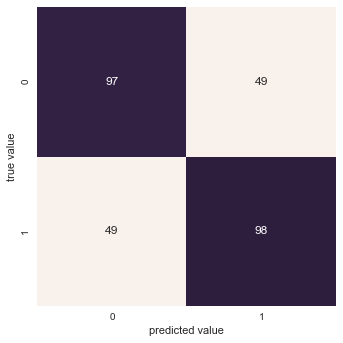

In [9]:

#'外資連N日買超','投信 連買(天)',
# set 1

getColName = ['主力 TOP15連買','三大法人連N日買超' ,'外資連N日買超','投信 連買(天)'     
              ,'5日漲幅(%)','20日漲幅(%)','近20日資餘增減','大戶近1週增減％','散戶近1週增減％'
              ,'主力 TOP15 買超新高(天)','主力 TOP15買家集中天數(％)'
              ,'股價乖離月線幅度(%)','股價乖離季線幅度(%)','股價乖離年線幅度(%)']


x_df = df.loc[:,getColName]

# updown5 updown10 updown20 updown
y_df = pd.DataFrame( df['賺_20'],columns=['賺_20'])


X1, X2, y1, y2 = train_test_split(x_df,y_df, random_state=0,train_size=0.8, test_size=0.2)

#
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=10)
decision_tree.fit(X1, y1)
acc_decision_tree = round(decision_tree.score(X1, y1) * 100, 2)
print('tree train : ',acc_decision_tree)

y2_model = decision_tree.predict(X2)
print('tree test : ' , round(accuracy_score(y2, y2_model)*100, 2))

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y2, y2_model)

# Plot the confusion matrix as a color-encoded matrix...
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

'''
y2_pre= decision_tree.predict(X_pre)
#print(y2_pre)

df_pre.insert(4,'check',y2_pre,True)
#df_pre.head()


df_pre = df_pre[(df_pre['check'] == 'Y')]
writer1= pd.ExcelWriter("c:/pythondata/StockSystem_20180604_0608_系統選股1.xlsx")
df_pre.to_excel(writer1,'Sheet1',index = False)
writer1.save()
'''

print('save ok')

In [3]:
dot_data = tree.export_graphviz(decision_tree, out_file=None,
                         class_names=['N','Y'],
                         feature_names=x_df.columns,
                         #feature_names=iris.feature_names, 
                         #class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
#dot_data
#graph = graphviz.Source(dot_data) 
#graph 

In [209]:
df_Sys = pd.read_excel("c:/pythondata/StockSystem_20180418_0511_系統選股Test.xlsx")
df_Sys = df_Sys[df_Sys['check'] == 'Y']
df_Sys.head()

,date,日期,K線,股票代號,check,股票名稱,買家集中連續天數,總市值(億),財務信評,收盤價,...,外資持股比率(%).1,投信持股比率(%).1,自營商持股比率(%),股價乖離月線幅度(%),股價乖離季線幅度(%),股價乖離年線幅度(%),收盤價創N日新高,成交量創N日新高,較5日均量縮放N%,較20日均量縮放N%
101,2018-05-14,2018-05-14,3221,3221,Y,台嘉碩,3,20.0,5,20.80,...,4.06,0.0,0.00,4.5,9.6,9.6,0,-7,-28.1,-58.2
314,2018-05-15,2018-05-15,3221,3221,Y,台嘉碩,4,19.6,5,20.35,...,4.07,0.0,0.00,2.0,6.9,7.2,-2,-8,-36.1,-66.9
322,2018-05-15,2018-05-15,3508,3508,Y,位速,3,47.4,6,49.10,...,16.36,0.0,1.96,5.9,7.1,43.8,0,-8,-36.2,-36.1
328,2018-05-15,2018-05-15,3609,3609,Y,東林,3,4.3,6,14.10,...,0.16,0.0,0.00,3.8,4.2,-3.6,0,-5,-85.2,-56.3
343,2018-05-15,2018-05-15,4402,4402,Y,福大,3,5.5,9,11.95,...,0.00,0.0,0.00,6.2,-0.7,-10.9,0,-10,-87.9,-72.2


In [211]:
df_P0 = pd.read_excel("c:/pythondata/StockMerg_20180514_0518.xlsx")
df_P1 = df_P0.copy()
df_P1.head()

df_P1 = df_P1[(df_P1['進出分點總家數'] >= 50) & (df_P1['外資連N日買超'] >= 2) & (df_P1['主力 TOP15連買'] >= 2)
              & (df_P1['大戶近1週增減％'] > 0) & (df_P1['散戶近1週增減％'] < 0) & (df_P1['近20日資餘增減'] < 0)
              & (df_P1['5日漲幅(%)'] > 0) & (df_P1['20日漲幅(%)'] > 0)
              & (df_P1['成交量'] >= 300) & (df_P1['本益比'] <= 20)]

df_P2 = df_P1.copy()
df_P2 = df_P2.loc[:,['日期','股票代號','股票名稱','成交量','本益比','進出分點總家數','外資連N日買超','主力 TOP15連買',
'大戶近1週增減％','散戶近1週增減％','近20日資餘增減','5日漲幅(%)','20日漲幅(%)']]
df_P2.head()

#系統與聰全選的同時出現的股票
samepd = pd.merge(df_Sys,df_P2,on=['日期','股票名稱'])
samepd = samepd.iloc[:,[0,2,3]]
#samepd = samepd[samepd['日期'] == '2018-05-25']
print("都出現的筆數:" ,len(samepd))
samepd.head(10)

都出現的筆數: 0


,date,K線,股票代號_x
